In [154]:
include("../Data&Libraries/1.Libraries.jl")
include("1.1.Linear_Gibbs.jl")
include("1.2.Probit_Gibbs.jl")
include("1.3.Hier_Poisson_Gamma.jl")

Status: Correct Import


HPG_Gibbs_sampler (generic function with 2 methods)

### **Probit Regression**

**Data Import and Transformations**

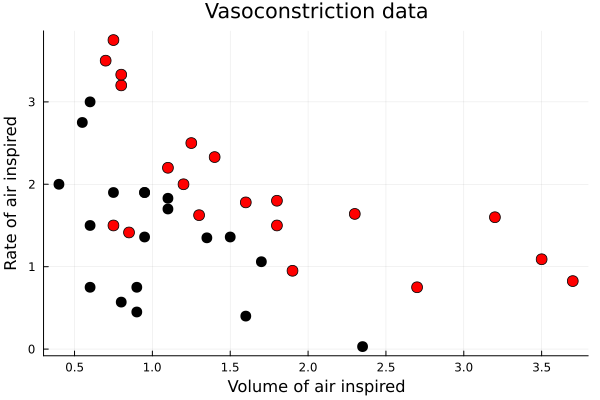

In [2]:
folder_path = raw"C:\Users\mussi\Documents\Manhattan\Leuven\MCQMC\Data&Libraries\\"
df_vaso = CSV.read(folder_path * "DB_Vaso.csv", DataFrame)
rename!(df_vaso, [:x1, :x2, :y])

scatter(
    df_vaso.x1, df_vaso.x2,
    group = df_vaso.y,
    markershape = :circle,
    markersize = 6,
    palette = ["black", "red"],   # y=0 nero, y=1 rosso
    xlabel = "Volume of air inspired",
    ylabel = "Rate of air inspired",
    title = "Vasoconstriction data",
    legend = false
)

### **GML: Probit Model**

In [3]:
@time probit = glm(@formula(y ~ x1+ x2), df_vaso, Binomial(), ProbitLink())

  5.130082 seconds (19.30 M allocations: 953.202 MiB, 5.31% gc time, 99.94% compilation time: <1% of which was recompilation)


StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Binomial{Float64}, ProbitLink}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

y ~ 1 + x1 + x2

Coefficients:
────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error      z  Pr(>|z|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────
(Intercept)  -5.19454    1.59339   -3.26    0.0011  -8.31752    -2.07156
x1            2.11804    0.717416   2.95    0.0032   0.711934    3.52415
x2            1.47643    0.46176    3.20    0.0014   0.571401    2.38147
────────────────────────────────────────────────────────────────────────

### **Gibbs: Albert & Chib 1993**

In [97]:
d = size(df_vaso)[1]; p = size(df_vaso)[2] 
Y = Vector(df_vaso.y); X = hcat(ones(d), Matrix(df_vaso[:, 1:2]));
probit_IID = Probit_Gibbs_WCUD(X, Y)

N = 1021; seq = rand(p+d, N, 300);

In [151]:
@time BProbitR = Probit_Gibbs_sampler_2(probit_IID, seq, 200 , N, 300)

BoundsError: BoundsError: attempt to access 8-element Vector{Float64} at index [9]

In [104]:
BProbitR.x_t[:,200,:]              

3×300 Matrix{Float64}:
 -6.73585  -5.18189  -5.99547  -5.58749  …  -4.78098  -7.23229  -3.56676
  3.25122   1.97438   3.24388   2.10994      1.84529   3.05924   1.76926
  1.67235   1.6085    1.17791   1.6316       1.43215   1.98793   0.965483

In [105]:
BProbitR.Var_Beta

3-element Vector{Float64}:
 0.055310849418764255
 0.013362000877527506
 0.003722633967604057

### **Hierarchical Poisson-Gamma**

In [155]:
folder_path = raw"C:\Users\mussi\Documents\Manhattan\Leuven\MCQMC\Data&Libraries\\"
df_pump = CSV.read(folder_path * "DB_Nuclear_Pumps.csv", DataFrame)
Y = Vector(df_pump.Failures); X = Vector(df_pump.Time);
N = 5000; p = length(Y)+1; R= 300; Burn_in = 500; seq = rand(p, N, R);

HPG = H_Poisson_Gamma(Y, X);

In [156]:
@time HPG_IID = HPG_Gibbs_sampler(HPG, seq, N, Burn_in, R)

 11.506734 seconds (267.12 k allocations: 253.567 MiB, 8.53% gc time, 4.19% compilation time)


(lambda_chains = [0.07527156421341213 0.10753396599511343 … 0.11169602972413961 0.07229438573616018; 0.11658058697129171 0.06351892840954101 … 0.21586124779274693 0.2501588063006867; … ; 0.7340607054614656 1.9154739223934565 … 1.5476215418203523 1.2708343899408878; 1.8323133473808868 1.4985659879056732 … 1.215285354630951 2.0188508731145105;;; 0.0578203048392526 0.05341793665035621 … 0.03275386067456156 0.07671411311358615; 0.27091858122178786 0.14139770514653321 … 0.14845696384426432 0.09001649895590055; … ; 2.1298478735670865 2.212728752029783 … 1.0528128574000888 0.7843410749422001; 2.088277996757546 1.6563075072154232 … 1.8085683759852802 1.8150493671097199;;; 0.08235632553005258 0.1163194806771545 … 0.0476117204242299 0.06742006088605566; 0.28264194971390944 0.0640045267979318 … 0.16497028554447324 0.14967101011463704; … ; 0.6765472132950918 0.6877106442105231 … 1.1246185090099334 0.6713224126241766; 1.9598721848266443 2.0120045946803855 … 1.0720901196147734 1.4058725730966062;;; 

In [157]:
HPG_IID.lambda_post_mean

10×1 Matrix{Float64}:
 0.07025265180662589
 0.15416912163974275
 0.10409307273559402
 0.12324729296368188
 0.627686849445898
 0.6139387059066961
 0.8283998185982602
 0.8285371328179915
 1.3005082458609218
 1.8433128599136641

In [158]:
HPG_IID.var_lambdas

10-element Vector{Float64}:
 2.324215313385276e-6
 2.9748914383574873e-5
 5.221971925416206e-6
 3.217014256429564e-6
 0.0002862323967531078
 6.208685157180018e-5
 0.0009128220257367163
 0.0009267511191369289
 0.0011269068462404755
 0.0005003876138203956

| Pump  | MC              | QMC             | Ratio |
|-------|-----------------|-----------------|-------|
| λ₁    | 6.71 × 10⁻⁷     | 3.99 × 10⁻⁹     | 168.0 |
| λ₂    | 7.66 × 10⁻⁶     | 5.61 × 10⁻⁸     | 136.5 |
| λ₃    | 1.52 × 10⁻⁶     | 8.92 × 10⁻⁹     | 170.1 |
| λ₄    | 9.79 × 10⁻⁷     | 4.65 × 10⁻⁹     | 210.5 |
| λ₅    | 9.40 × 10⁻⁵     | 7.25 × 10⁻⁷     | 129.8 |
| λ₆    | 1.49 × 10⁻⁵     | 1.09 × 10⁻⁷     | 136.1 |
| λ₇    | 3.31 × 10⁻⁴     | 8.71 × 10⁻⁶     | 38.0  |
| λ₈    | 3.12 × 10⁻⁴     | 2.25 × 10⁻⁵     | 13.9  |
| λ₉    | 3.93 × 10⁻⁴     | 3.96 × 10⁻⁶     | 99.3  |
| λ₁₀   | 1.84 × 10⁻⁴     | 1.03 × 10⁻⁶     | 178.9 |
| β     | 8.68 × 10⁻⁴     | 1.07 × 10⁻⁵     | 80.8  |

*Shown are MC and QMC variances and their ratio for the parameters of the pump data model described in the text.*